In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from tqdm.notebook import tqdm
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [10]:
# path="UTKFace"

# image_paths = []
# age_labels = []
# gender_labels = []

# for filename in tqdm(os.listdir(path)):
#     image_path=os.path.join(path, filename)
#     temp=filename.split('_')
#     age= int(temp[0])
#     gender=int(temp[1])
#     age_labels.append(age)
#     image_paths.append(image_path)
#     gender_labels.append(gender)

dataset_dir = 'UTKFace'

# Read the image files and create a DataFrame
data = []
for filename in os.listdir(dataset_dir):
    if filename.endswith('.jpg'):
        image_path = os.path.join(dataset_dir, filename)
        
        age, gender = filename.split('_')[:2]
        data.append({'filename': image_path, 'age': int(age), 'gender': int(gender)})

df = pd.DataFrame(data)

# Display the DataFrame
print(df.head())
    

                                         filename  age  gender
0  UTKFace\100_0_0_20170112213500903.jpg.chip.jpg  100       0
1  UTKFace\100_0_0_20170112215240346.jpg.chip.jpg  100       0
2  UTKFace\100_1_0_20170110183726390.jpg.chip.jpg  100       1
3  UTKFace\100_1_0_20170112213001988.jpg.chip.jpg  100       1
4  UTKFace\100_1_0_20170112213303693.jpg.chip.jpg  100       1


In [9]:
df= pd.Dataframe()
df['image']=image_paths
df['age']=age_labels
df['gender']= gender_labels

df.head()

AttributeError: module 'pandas' has no attribute 'Dataframe'

In [11]:
gender_dict= {0:'Male', 1:'Female'}

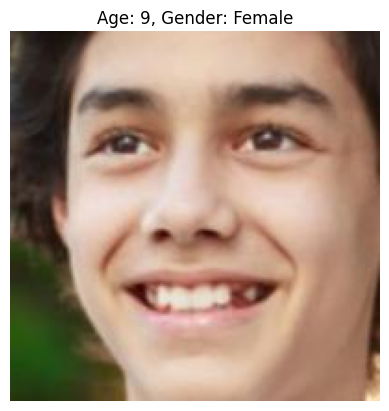

In [12]:
from PIL import Image
img = Image.open(df['filename'][100])
plt.title(f'Age: {age}, Gender: {"Male" if gender == 0 else "Female"}')
plt.axis('off')
plt.imshow(img)

<AxesSubplot: xlabel='age', ylabel='Density'>

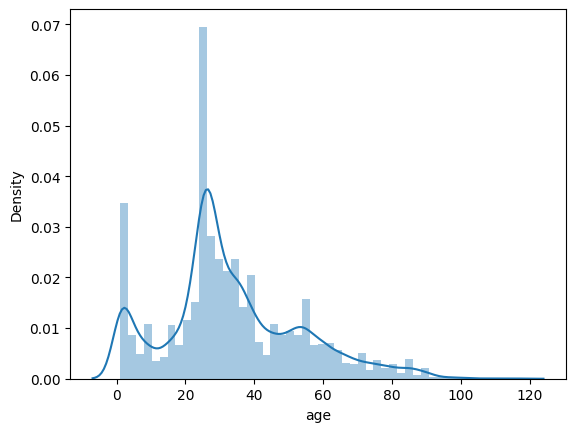

In [13]:
sns.distplot(df['age'])

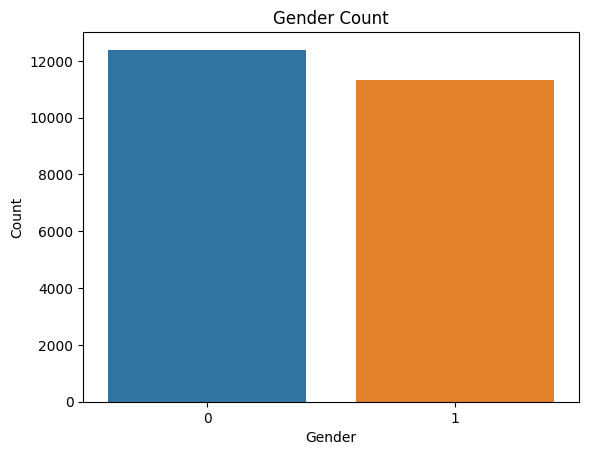

In [14]:
sns.countplot(data=df, x='gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Count')
plt.show()

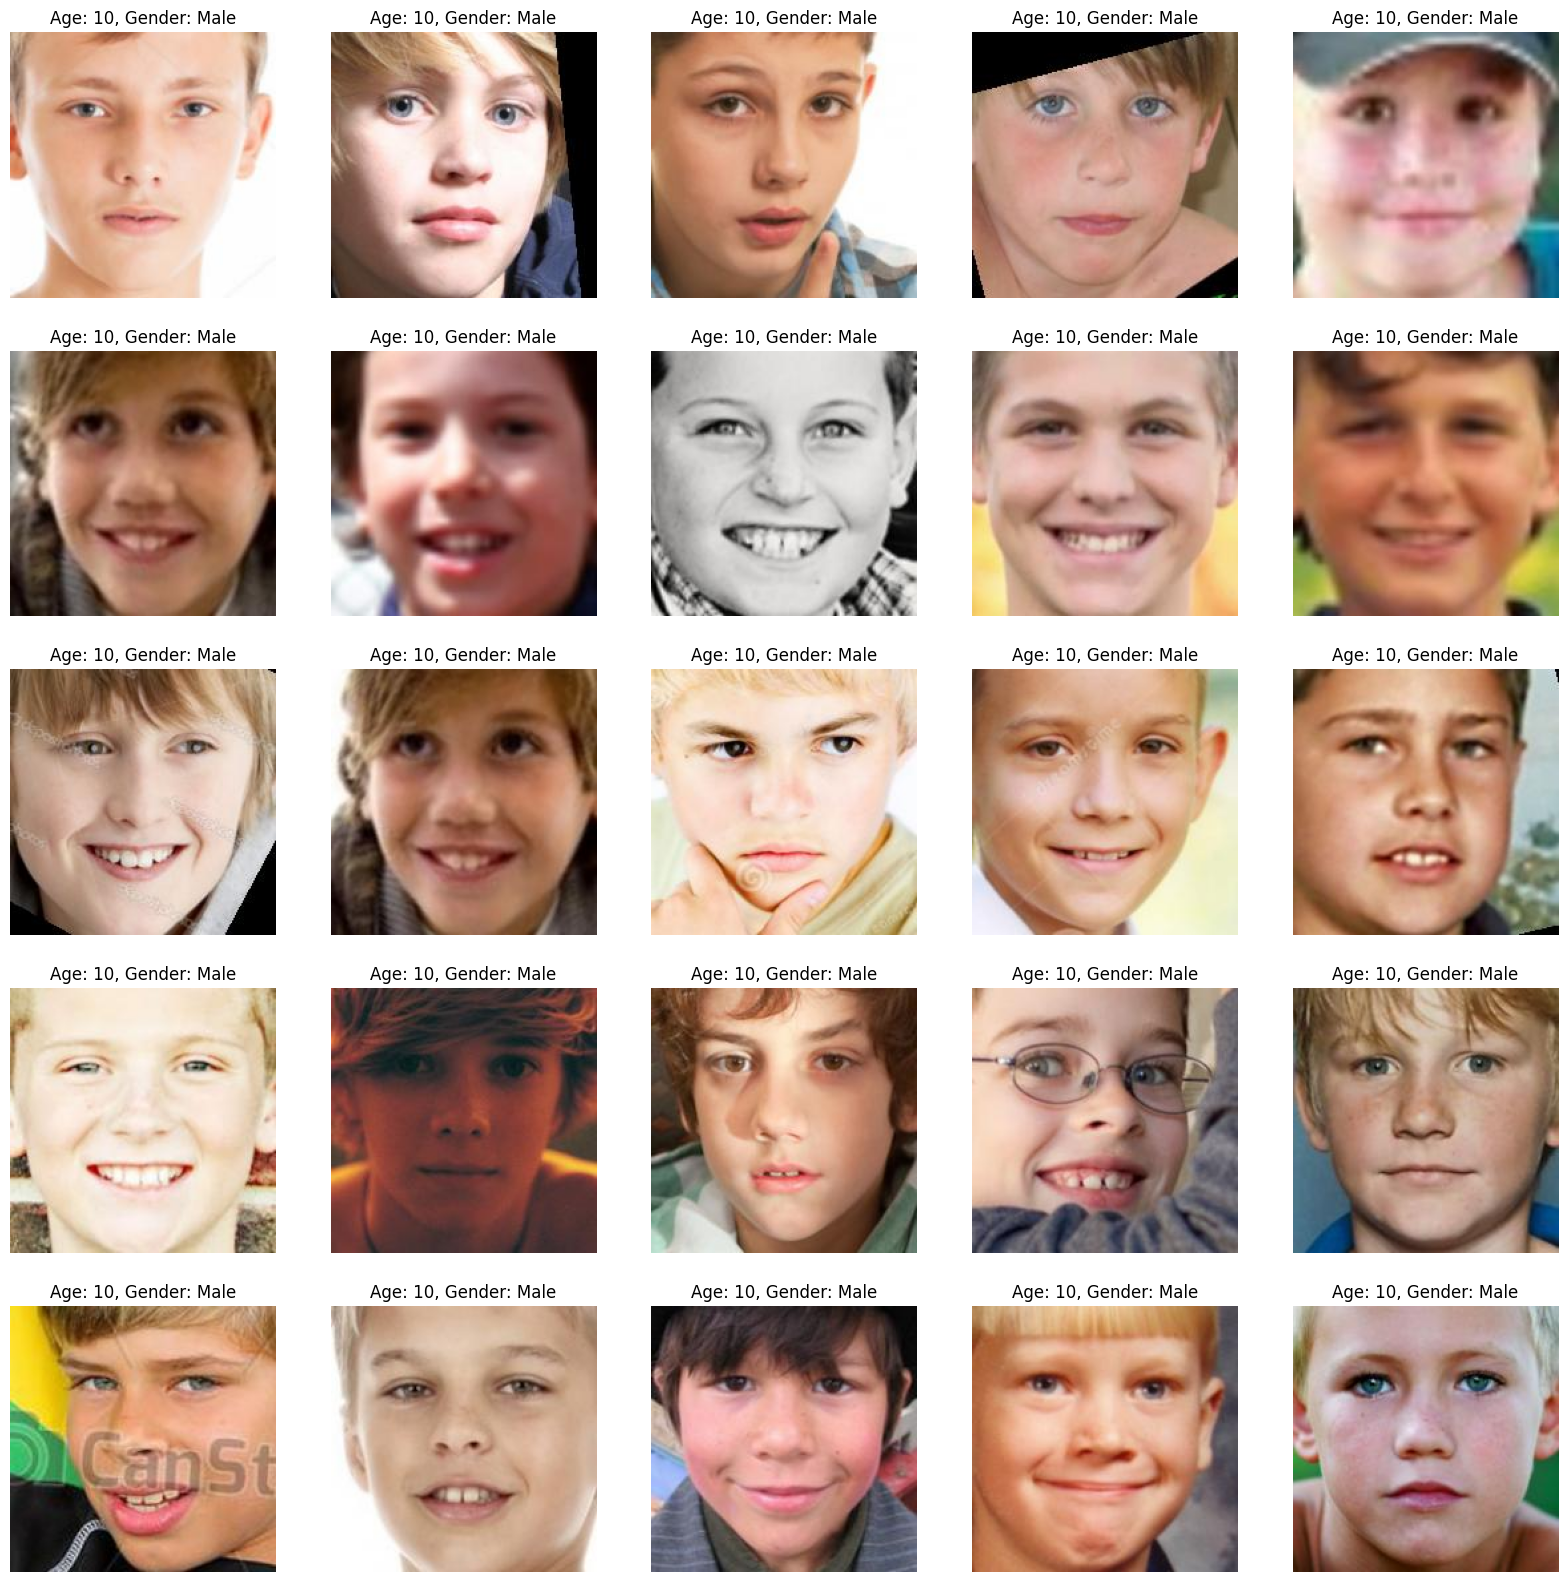

In [15]:
plt.figure(figsize=(20,20))
files = df.iloc[25:50]

for index, file, age, gender in files.itertuples():
    
    plt.subplot(5,5,index-24)
    img = Image.open(file)
    img = np.array(img)
    plt.imshow(img)
    plt.title(f'Age: {age}, Gender: {"Male" if gender == 0 else "Female"}')
    plt.axis('off')
    
    

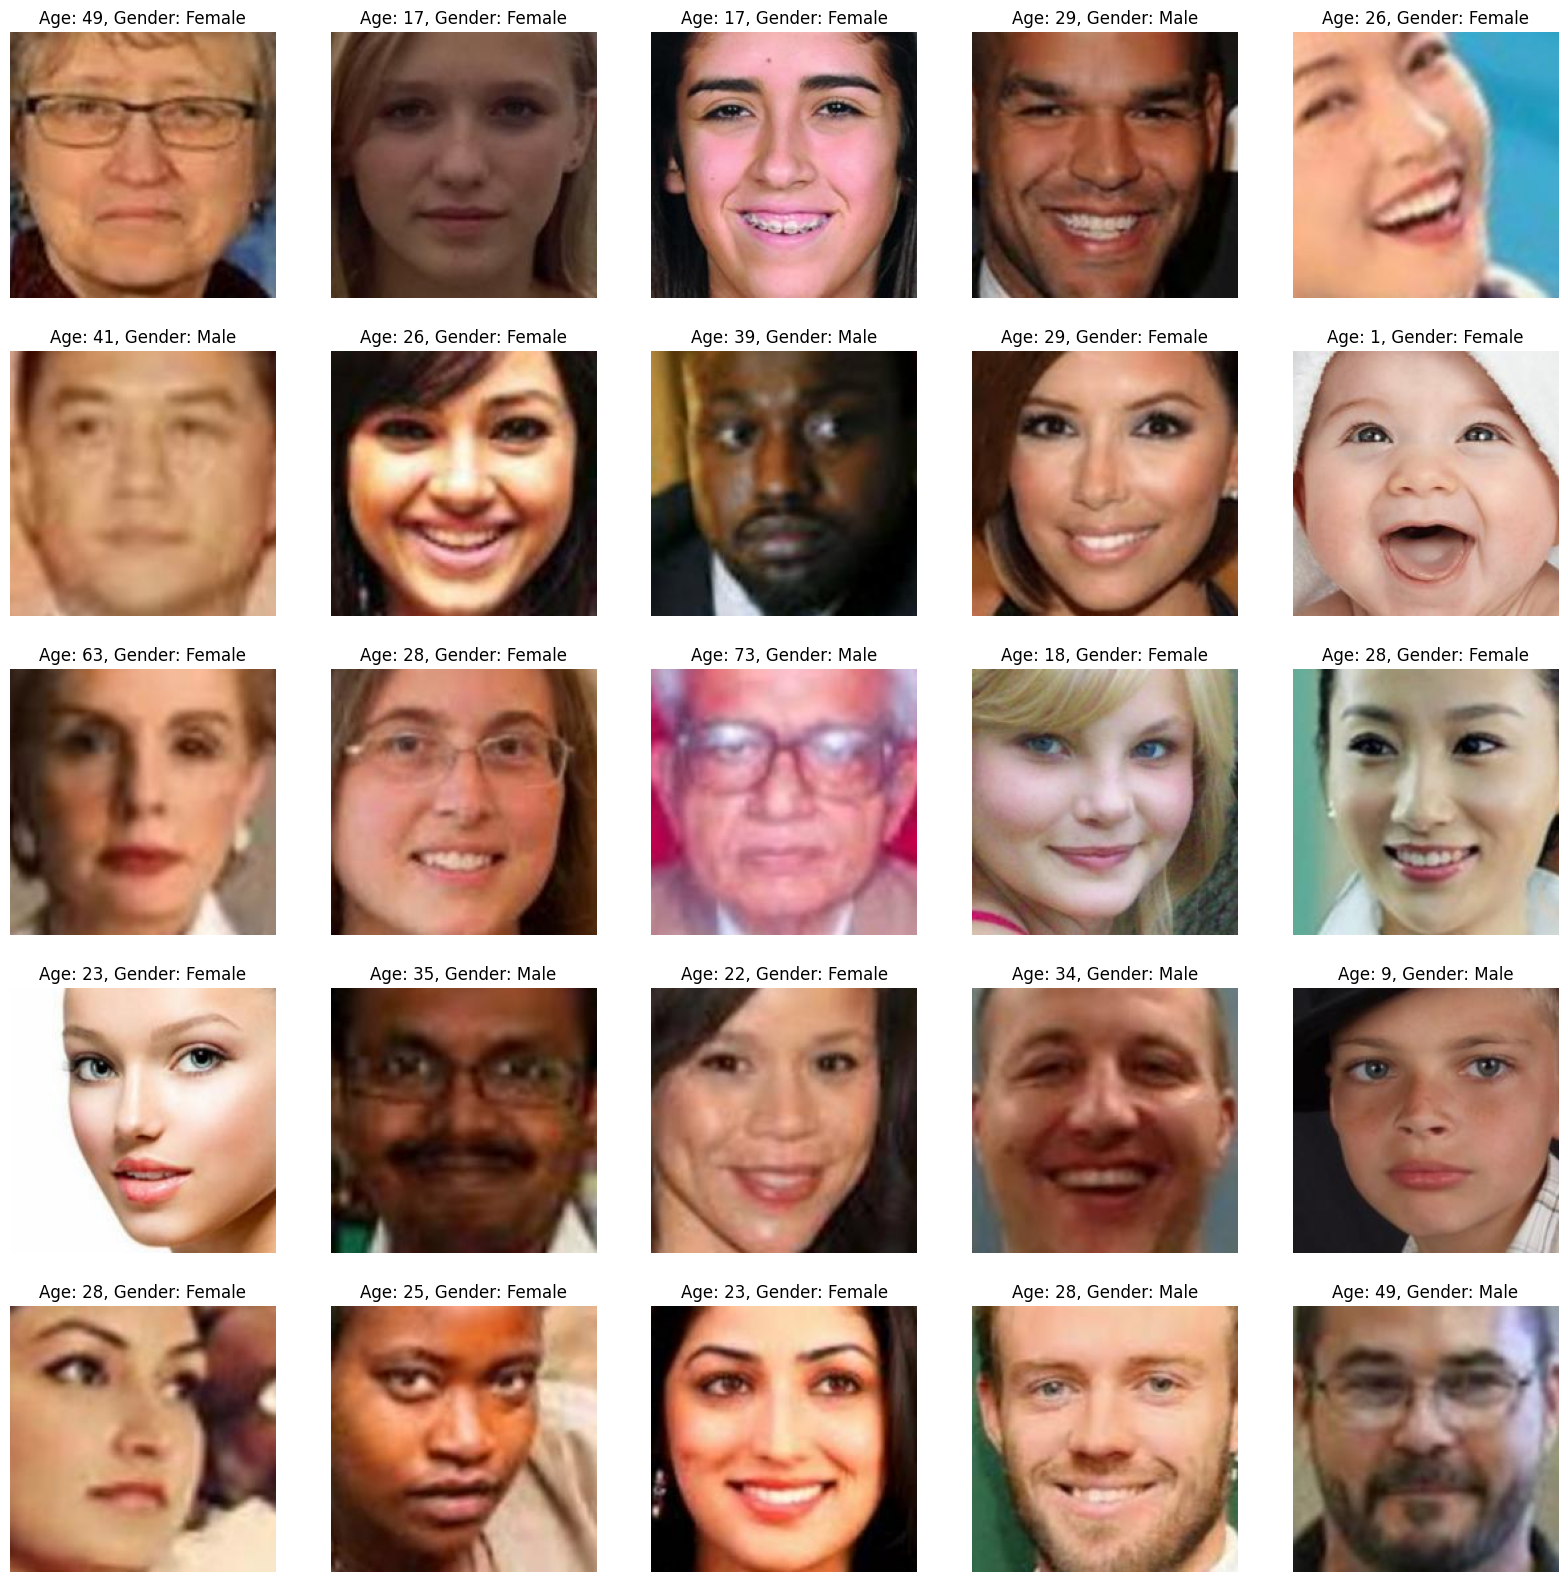

In [16]:
plt.figure(figsize=(20,20))
random_images = df.sample(n=25, random_state=42).reset_index(drop=True)

for index, file, age, gender in random_images.itertuples():
    
    plt.subplot(5,5,index+1)
    img = Image.open(file)
    img = np.array(img)
    plt.imshow(img)
    plt.title(f'Age: {age}, Gender: {"Male" if gender == 0 else "Female"}')
    plt.axis('off')
    

In [41]:
import cv2

# Function to preprocess the images
def preprocess_image(image_path, target_size):
    # Read the image using OpenCV
    image = cv2.imread(image_path)

    # Resize the image to the target size
    image = cv2.resize(image, target_size)

    # Normalize the pixel values to [0, 1]
    image = image.astype('float32') / 255.0

    # Return the preprocessed image
    return image

# Set the target size for resizing
target_size = (256, 256)

# Preprocess each image in your dataset
preprocessed_images = []
for image_path in df['filename']:
    preprocessed_image = preprocess_image(image_path, target_size)
    preprocessed_images.append(preprocessed_image)

# Convert the preprocessed images to a NumPy array
preprocessed_images = np.array(preprocessed_images)


In [17]:

from tensorflow.keras.preprocessing.image import load_img


def extract_features(images):
    features=[]
    for image in tqdm(images):
        img= load_img(image, grayscale= True)
        img=img.resize((128, 128), Image.ANTIALIAS)
        img=np.array(img)
        
    features = np.array
    
    features = features.reshape(len(features), 128, 128, 1)
    return features

In [18]:
X = extract_features(df['filename'])

  0%|          | 0/23708 [00:00<?, ?it/s]

AttributeError: 'builtin_function_or_method' object has no attribute 'reshape'